# Finance Data Project ( TSLA, CMGR, UUU, QS, GOOG)




In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [2]:
# !pip install yfinance --upgrade --no-cache-dir

In [3]:
import yfinance as yf

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
* TSLA
* CMGR
* UUU
* QS 
* GOOG


In [104]:
from pandas_datareader import data as pdr
import yfinance as yf

tickers = ['TSLA', 'CMGR', 'UUU', 'QS', 'GOOG']
start = datetime.datetime(2011,1,1)
end = datetime.datetime(2021,8,27)
df = yf.download(tickers, start=start, end=end)

[*********************100%***********************]  5 of 5 completed


In [105]:
df.tail()

Adj Close                                           Close  \
                CMGR         GOOG         QS        TSLA   UUU  CMGR   
Date                                                                   
2021-08-20      2.20  2768.739990  19.610001  680.260010  5.45  2.20   
2021-08-23      2.00  2821.989990  20.590000  706.299988  5.40  2.00   
2021-08-24      1.99  2847.969971  21.299999  708.489990  5.90  1.99   
2021-08-25      1.83  2859.000000  21.250000  711.200012  6.77  1.83   
2021-08-26      1.85  2842.459961  21.270000  701.159973  6.90  1.85   

                                                      ...   Open               \
                   GOOG         QS        TSLA   UUU  ...   CMGR         GOOG   
Date                                                  ...                       
2021-08-20  2768.739990  19.610001  680.260010  5.45  ...  2.275  2741.659912   
2021-08-23  2821.989990  20.590000  706.299988  5.40  ...  2.200  2779.969971   
2021-08-24  2847.969971  21.299999  708.489990  5.90  ...  2.000  2830.870117   
2021-08-25  2859.000000  21.250000  711.200012  6.77  ...  1.990  2857.659912   
2021-08-26  2842.459961  21.270000  701.159973  6.90  ...  1.900  2852.370117   

                                          Volume                      \
                   QS        TSLA   UUU     CMGR     GOOG         QS   
Date                                                                   
2021-08-20  19.190001  682.849976  5.71  23400.0   778200  6486000.0   
2021-08-23  19.719999  685.440002  5.48  35000.0  1054500  6409200.0   
2021-08-24  20.840000  710.679993  5.48  18400.0   756300  5520800.0   
2021-08-25  20.930000  707.030029  6.49  24400.0   641900  5632000.0   
2021-08-26  21.190001  708.309998  7.69  24200.0   746100  7292400.0   

                                 
                TSLA        UUU  
Date                             
2021-08-20  14781800   151000.0  
2021-08-23  20264900    54800.0  
2021-08-24  13083100   619000.0  
2021-08-25  12645600  8437800.0  
2021-08-26  13214300  7233700.0  

[5 rows x 30 columns]

# EDA


In [106]:
df['Close'].head()

,CMGR,GOOG,QS,TSLA,UUU
Date,,,,,
2011-01-03,0.22,301.046600,NaN,5.324,7.35
2011-01-04,NaN,299.935760,NaN,5.334,7.40
2011-01-05,NaN,303.397797,NaN,5.366,7.31
2011-01-06,0.24,305.604523,NaN,5.576,8.16
2011-01-07,0.24,307.069031,NaN,5.648,7.99


In [107]:
df['Close'].max()

CMGR      27.400000
GOOG    2859.000000
QS       131.669998
TSLA     883.090027
UUU       11.100000
dtype: float64

In [108]:
df['Close'].min()

CMGR      0.001000
GOOG    236.553345
QS        9.793000
TSLA      4.366000
UUU       0.330000
dtype: float64

### Returns for each stock. 
$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [109]:
returns=pd.DataFrame()

In [110]:
for tick in tickers:
    returns[tick+ ' Return'] = df['Close'][tick].pct_change()

In [111]:
returns.head()

,TSLA Return,CMGR Return,UUU Return,QS Return,GOOG Return
Date,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN
2011-01-04,0.001878,0.000000,0.006803,NaN,-0.003690
2011-01-05,0.005999,0.000000,-0.012162,NaN,0.011543
2011-01-06,0.039135,0.090909,0.116279,NaN,0.007273
2011-01-07,0.012912,0.000000,-0.020833,NaN,0.004792


C:\Users\Yasser B\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning:

invalid value encountered in greater_equal

C:\Users\Yasser B\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning:

invalid value encountered in less_equal



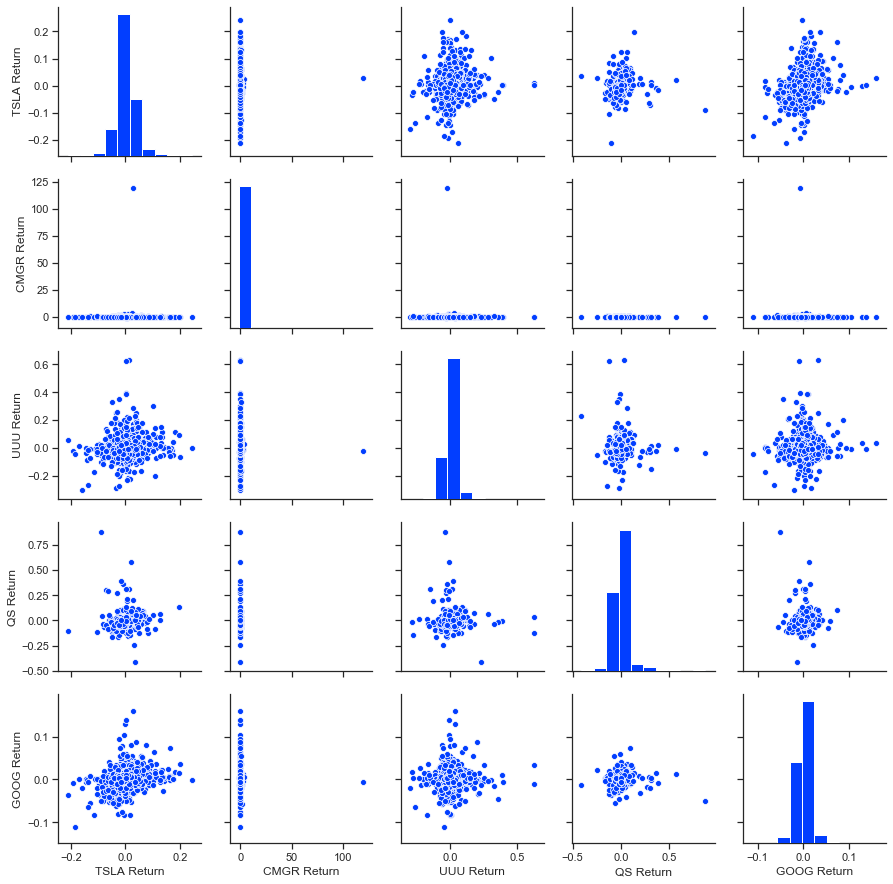

In [112]:
import seaborn as sns
sns.set(style='ticks', palette='bright')

sns.pairplot(returns[1:])

In [115]:
returns.min()

TSLA Return   -0.210628
CMGR Return   -0.993333
UUU Return    -0.300000
QS Return     -0.408407
GOOG Return   -0.111008
dtype: float64

In [116]:
returns.idxmin()

TSLA Return   2020-09-08
CMGR Return   2018-05-02
UUU Return    2020-03-18
QS Return     2021-01-04
GOOG Return   2020-03-16
dtype: datetime64[ns]

In [118]:
returns.max()

TSLA Return      0.243951
CMGR Return    118.999992
UUU Return       0.626866
QS Return        0.874000
GOOG Return      0.160524
dtype: float64

In [119]:
returns.idxmax()

TSLA Return   2013-05-09
CMGR Return   2019-03-26
UUU Return    2020-10-29
QS Return     2020-09-03
GOOG Return   2015-07-17
dtype: datetime64[ns]

In [120]:
returns.std().sort_values()

GOOG Return    0.016212
TSLA Return    0.034886
UUU Return     0.050861
QS Return      0.106136
CMGR Return    2.302722
dtype: float64

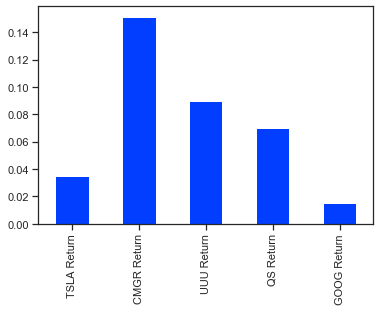

In [121]:
returns[returns.index.year==2021].std().plot.bar()

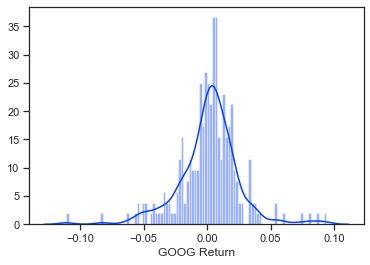

In [129]:

sns.distplot(returns[returns.index.year==2020]['GOOG Return'], bins=100)

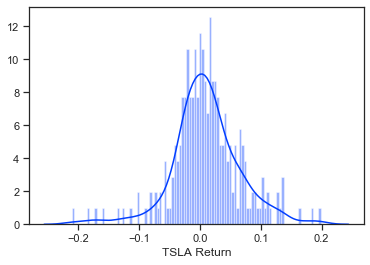

In [125]:
sns.distplot(returns[returns.index.year==2020]['TSLA Return'], bins=100)

C:\Users\Yasser B\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in greater

C:\Users\Yasser B\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning:

invalid value encountered in less



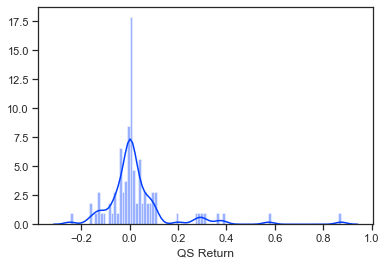

In [126]:
sns.distplot(returns[returns.index.year==2020]['QS Return'], bins=100)

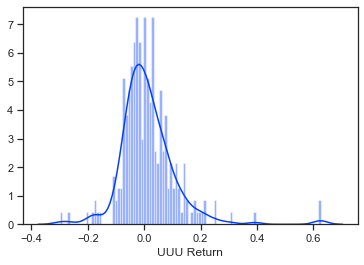

In [127]:
sns.distplot(returns[returns.index.year==2020]['UUU Return'], bins=100)

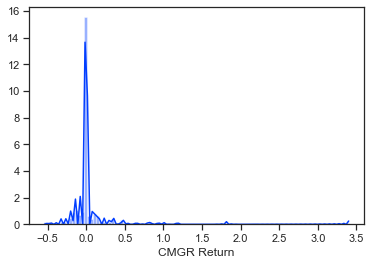

In [128]:
sns.distplot(returns[returns.index.year==2020]['CMGR Return'], bins=100)

____
# More Visualization


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

(737425.0, 738027.0)

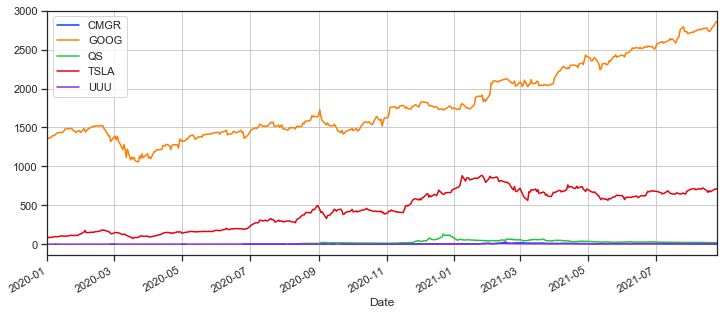

In [141]:
df['Close'].plot(kind='line', figsize=(12,5))
plt.grid('on')
plt.xlim(['2020-01-01', '2021-08-25'])

## Moving Averages


(737425.0, 738027.0)

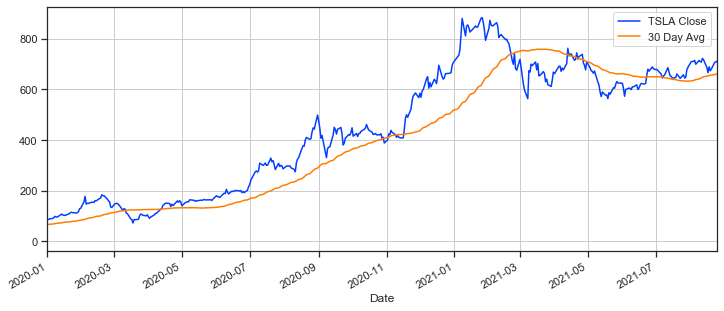

In [140]:
df['Close']['TSLA'].plot(kind='line', figsize=(12,5), label='TSLA Close')
df['Close']['TSLA'].rolling(window=60).mean().plot(kind='line', figsize=(12,5), label='30 Day Avg')
plt.legend()
plt.grid('on')
plt.xlim(['2020-01-01', '2021-08-25'])

(737425.0, 738027.0)

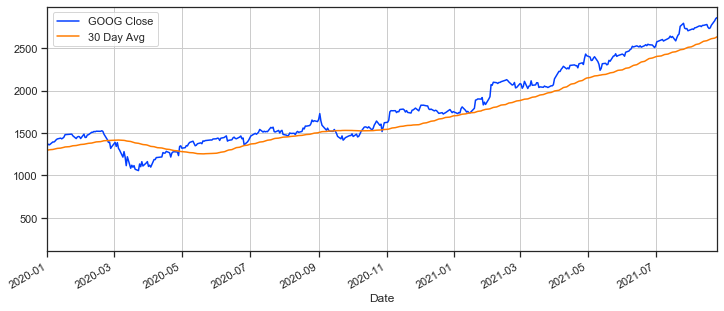

In [142]:
df['Close']['GOOG'].plot(kind='line', figsize=(12,5), label='GOOG Close')
df['Close']['GOOG'].rolling(window=60).mean().plot(kind='line', figsize=(12,5), label='30 Day Avg')
plt.legend()
plt.grid('on')
plt.xlim(['2020-01-01', '2021-08-25'])

** Create a heatmap of the correlation between the stocks Close Price.**

(5, 0)

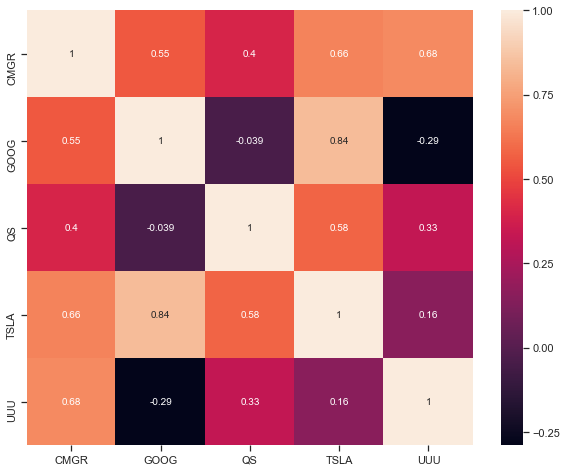

In [143]:
plt.figure(figsize=(10,8))
sns.heatmap(df['Close'].corr(), annot=True)
plt.ylim([5,0])



** Optional: Use seaborn's clustermap to cluster the correlations together:**

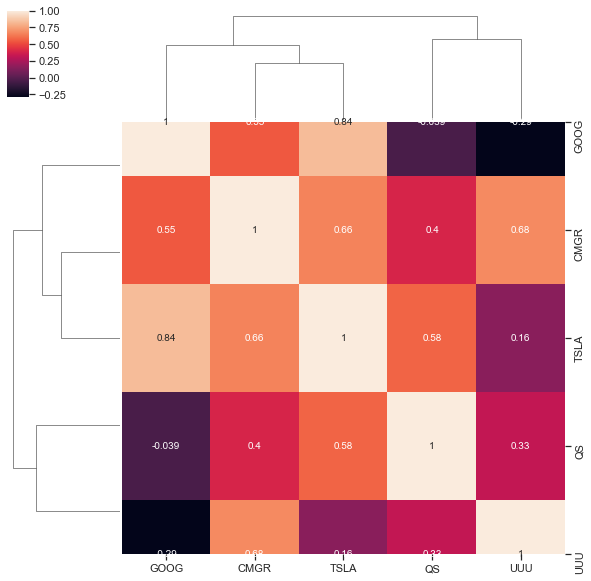

In [145]:
# plt.figure(figsize=(10,8))
sns.clustermap(df['Close'].corr(), annot=True)
# plt.ylim([5,0])
# 

# Done
